In [899]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


train_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Data_Train.xlsx")
#test_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Test_set.xlsx")

#df = pd.concat([train_df,test_df])

df = train_df



In [900]:
# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)

In [901]:
# Size of the Data
df.shape

(10682, 11)

In [902]:
# View of the Data
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [903]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [904]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [905]:
routeMissingRow = df[df['Route'].isnull() == True].index
routeMissingRow

Int64Index([9038], dtype='int64')

In [906]:
df.drop(routeMissingRow,inplace=True)


In [907]:
# how mathematically look like?

df.describe()

,Price
count,10681.000000
mean,9086.443123
std,4611.075357
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [908]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<AxesSubplot:>

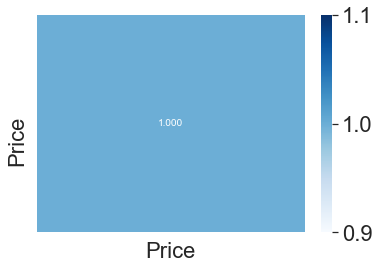

In [909]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [910]:
#counts/Unique

df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [911]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [912]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [913]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)


In [914]:
df.columns

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → 

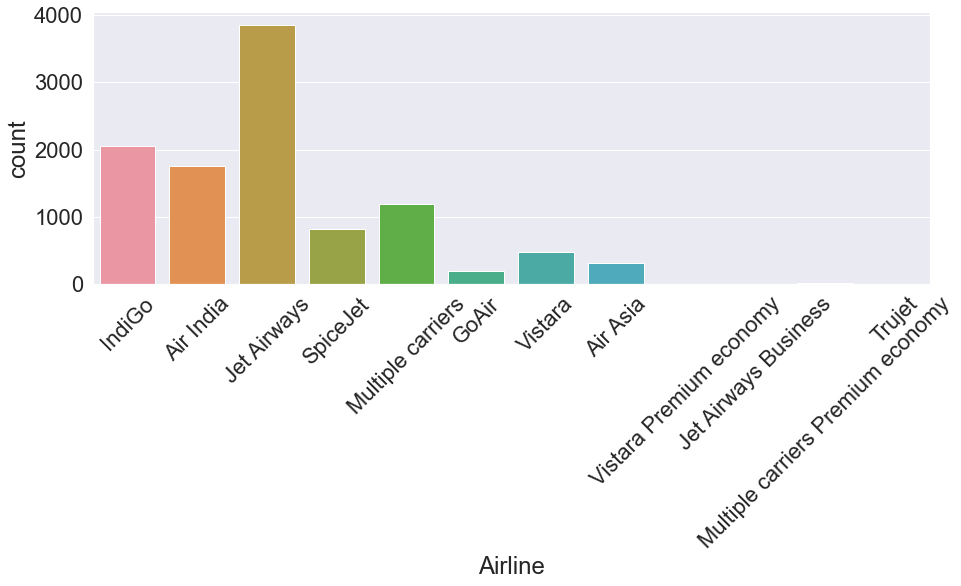

In [915]:
# Graph-Based Analysis
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


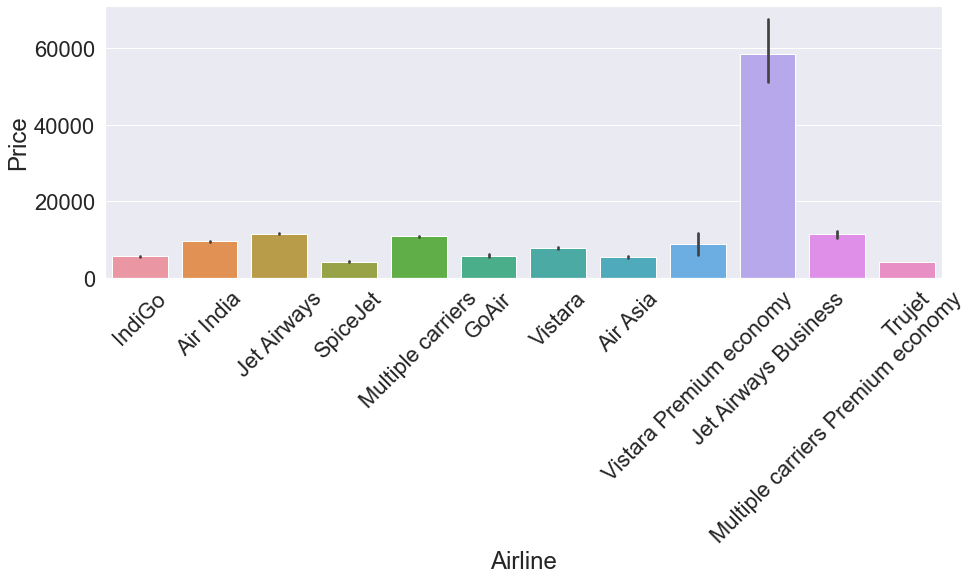

In [916]:
plt.figure(figsize=(15,5))

sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


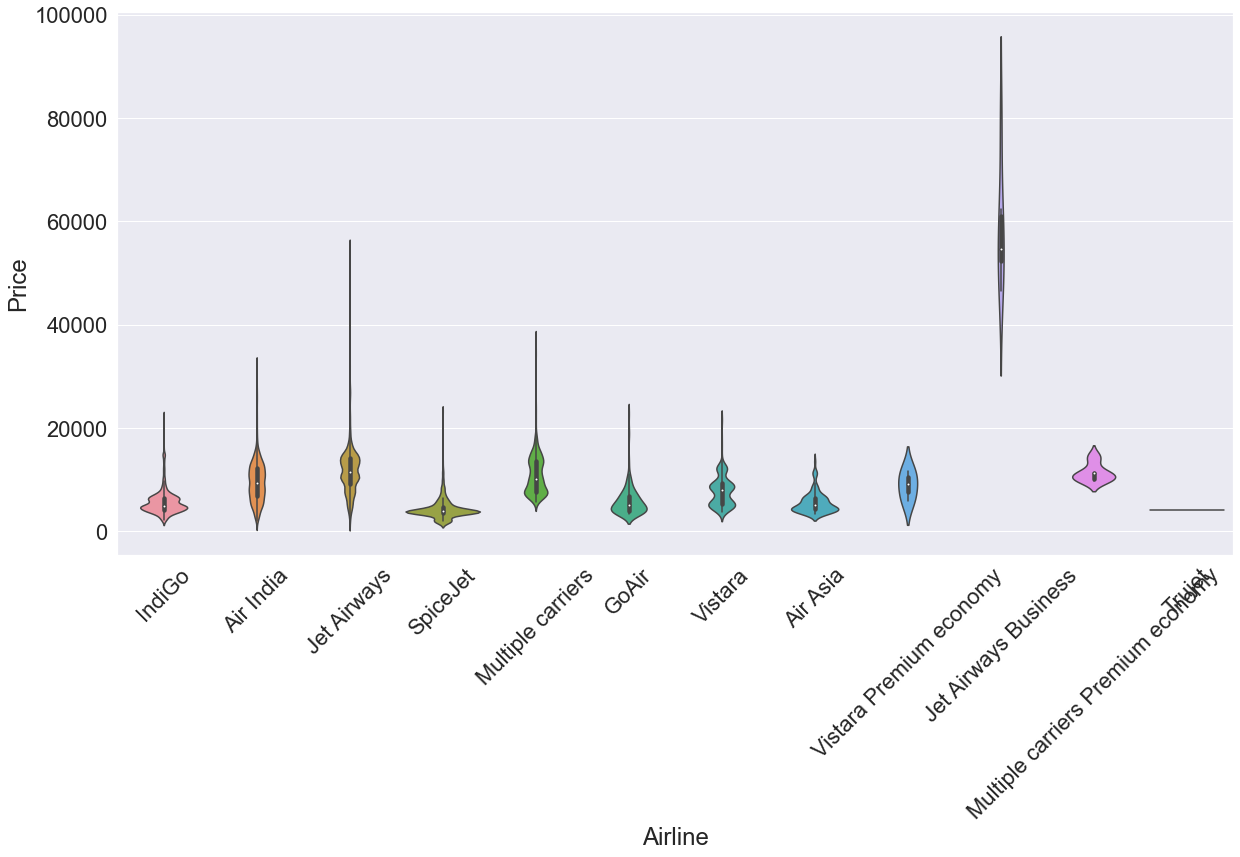

In [917]:

plt.figure(figsize=(20,10))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1440x360 with 0 Axes>

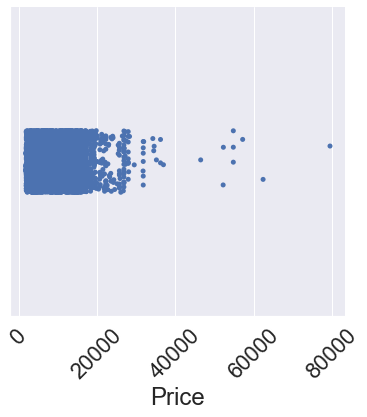

In [918]:
plt.figure(figsize=(20,5))
sns.catplot(data = df, x='Price')
plt.xticks(rotation=45) 
plt.show() 


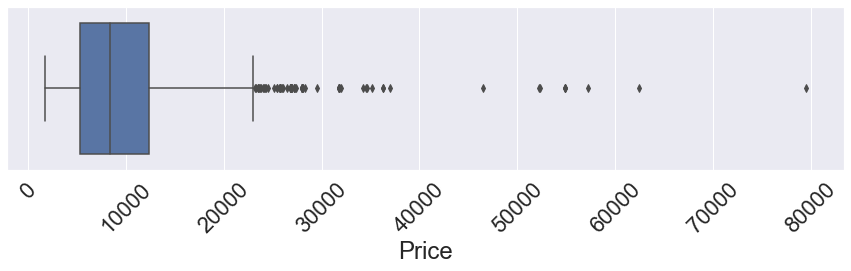

In [919]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



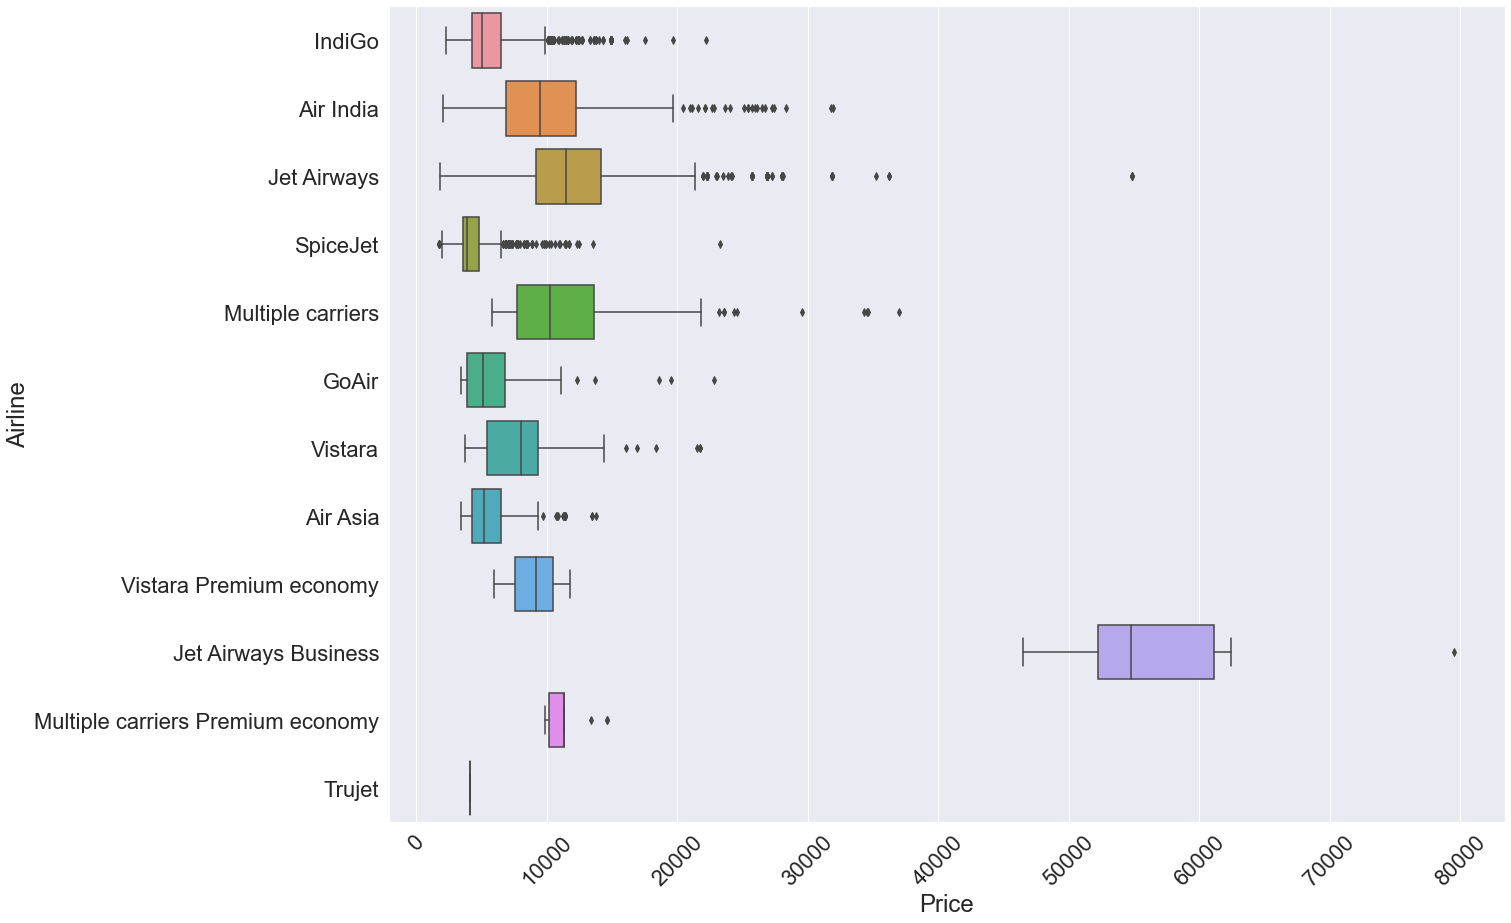

In [920]:
# Outlier Detection

plt.figure(figsize=(20,15))
sns.boxplot(y=df['Airline'],x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<AxesSubplot:xlabel='Price', ylabel='Density'>

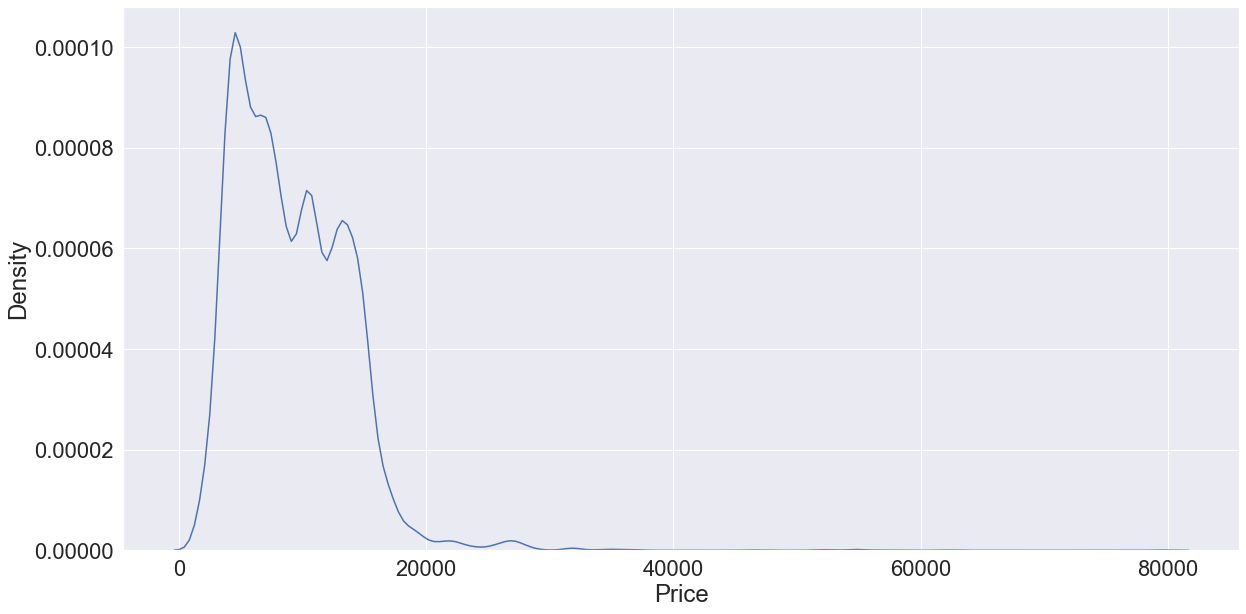

In [921]:

plt.figure(figsize=(20,10))
sns.kdeplot(x=df['Price'])


<AxesSubplot:xlabel='Price', ylabel='Count'>

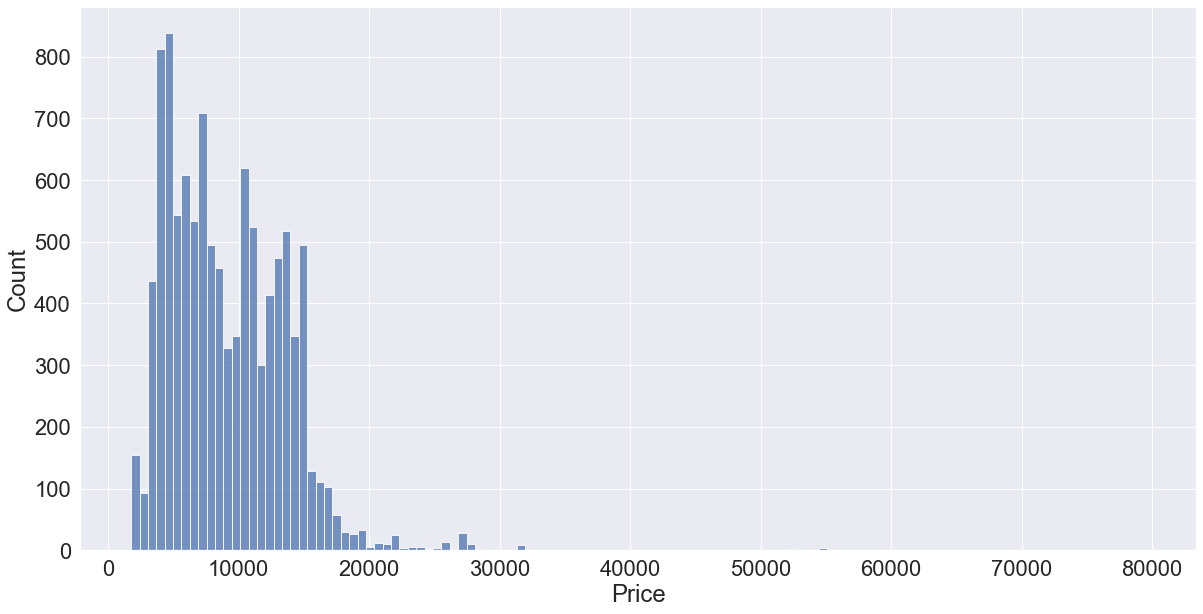

In [922]:
df['Airline']
plt.figure(figsize=(20,10))
sns.histplot(x=df['Price'])

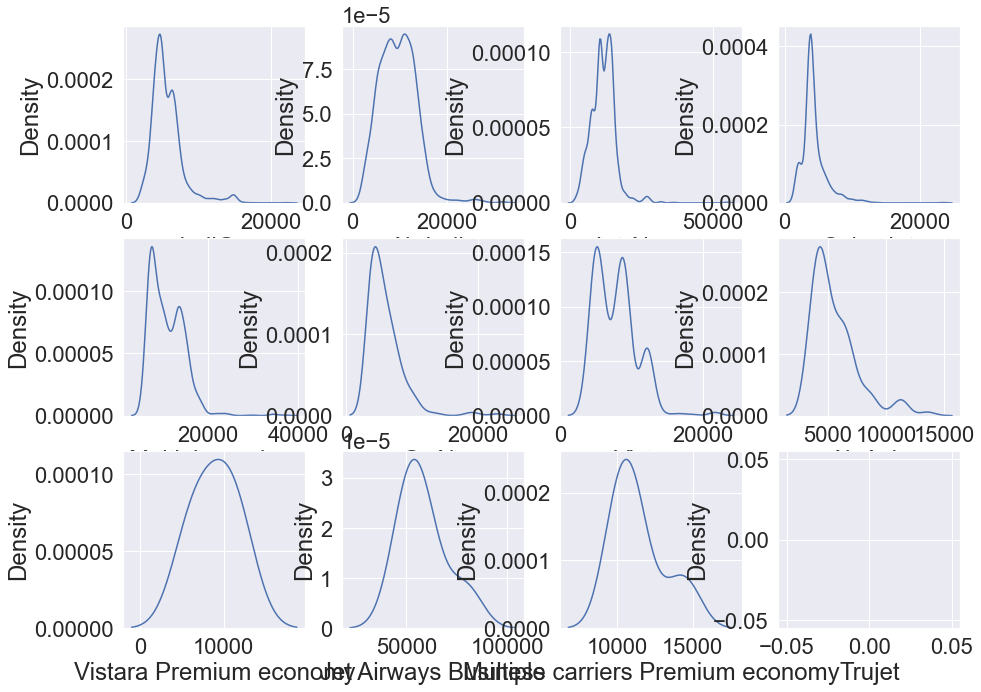

In [923]:
plt.figure(figsize=(15,15))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(4,4,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



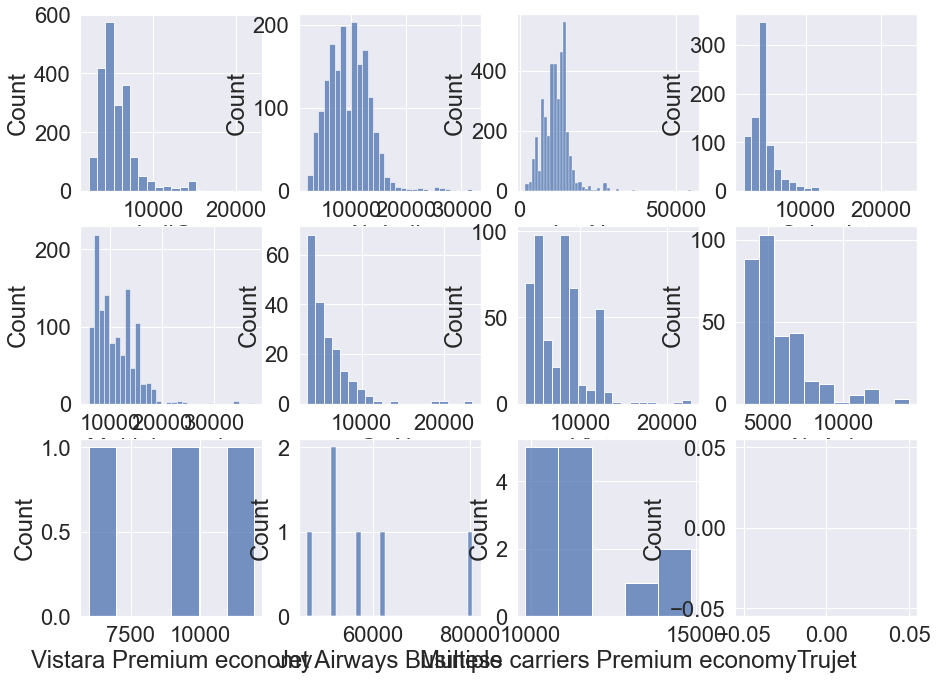

In [924]:
plt.figure(figsize=(15,15))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(4,4,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.histplot(x=indi['Price'],binwidth=1000)
    plt.xlabel(i[1]) 



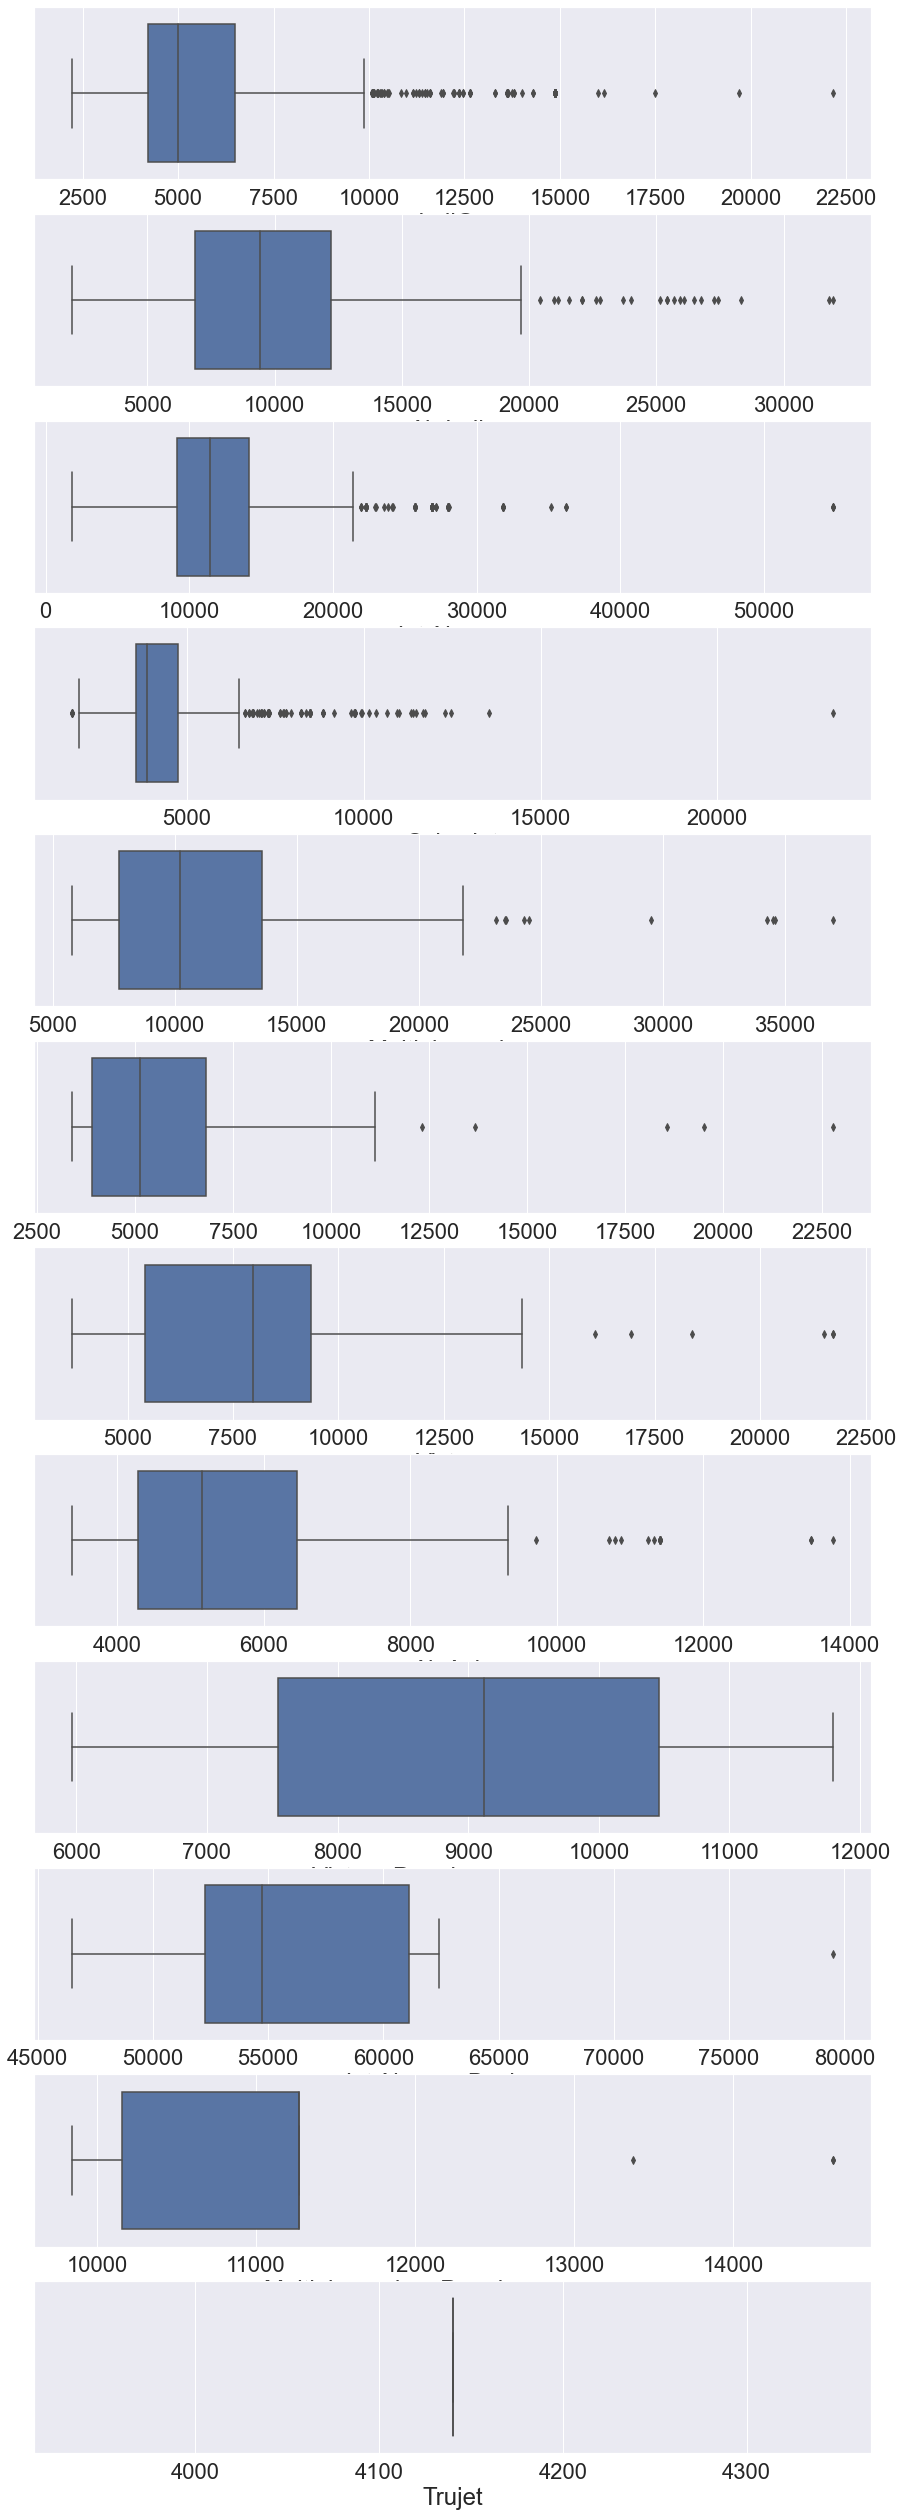

In [925]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



q1:  4226.0
lowerLimit:  824.0
upperLimit:  9896.0


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


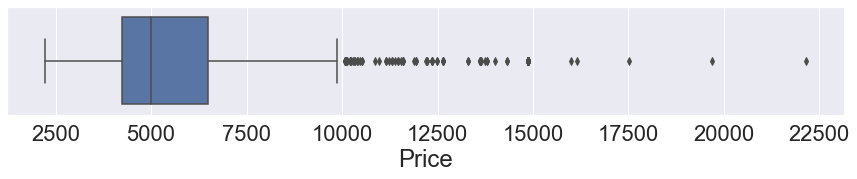

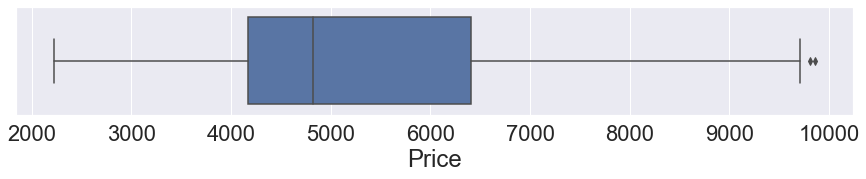

In [926]:
airDataSet = df[df['Airline'] == 'IndiGo']
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(0.75)

print('q1: ',q1)

IQR = q3-q1

lowerLimit = q1-IQR*1.5
upperLimit = q3+IQR*1.5
print('lowerLimit: ',lowerLimit)
print('upperLimit: ',upperLimit)

lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index

airDataSet.drop(upperLimitIndex,axis=0,inplace=True)

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

IndiGoDataSet = airDataSet
df

6961.0
12214.0
5253.0
-918.5
20093.5


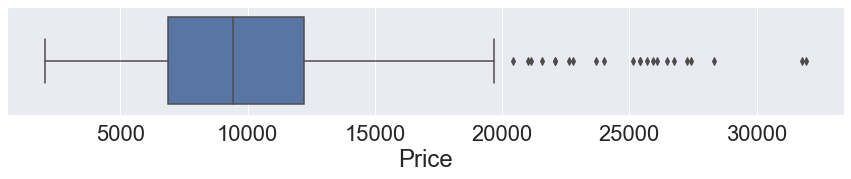

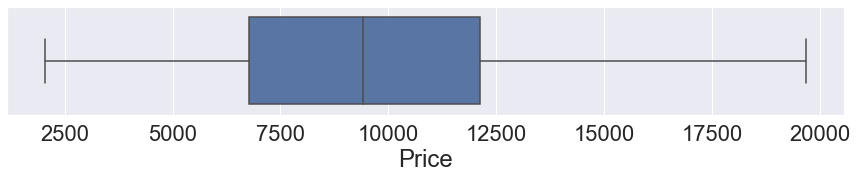

In [927]:
airDataSet = df[df['Airline']=='Air India']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.27)
q3 = airDataSet['Price'].quantile(0.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

AirIndiaDataSet = airDataSet

9564.0
14151.0
4587.0
2683.5
21031.5


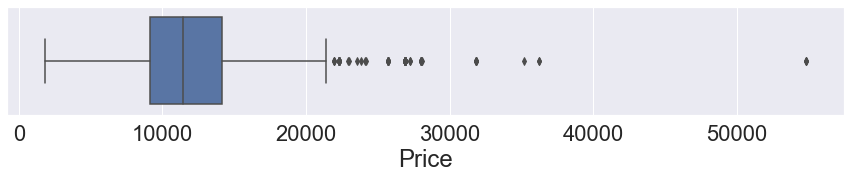

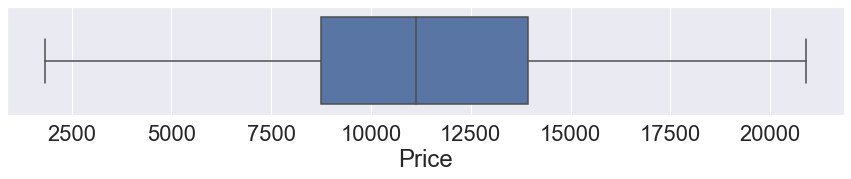

In [928]:
airDataSet = df[df['Airline']=='Jet Airways']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.27)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

JetAirwaysDataSet = airDataSet

3543.0
3925.0
382.0
2970.0
4498.0


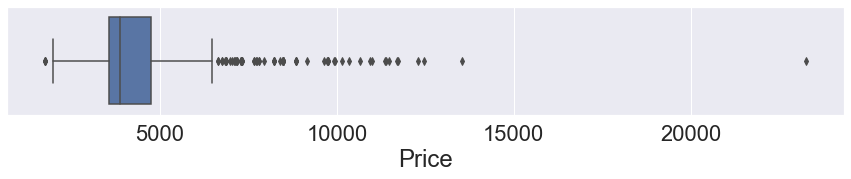

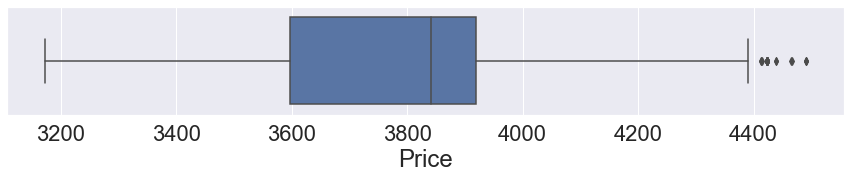

In [929]:
airDataSet = df[df['Airline']=='SpiceJet']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.60)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

SpiceJetDataSet = airDataSet



7485.0
13727.0
6242.0
-1878.0
23090.0


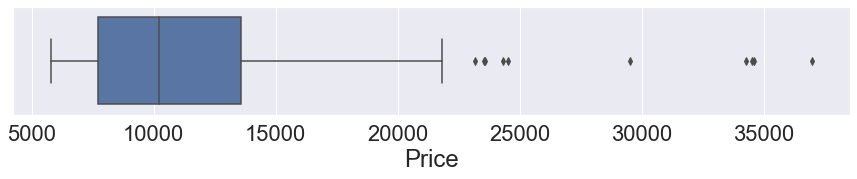

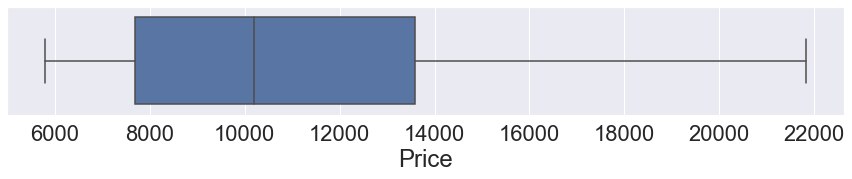

In [930]:
airDataSet = df[df['Airline']=='Multiple carriers']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.80)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

MultiplecarriersDataSet = airDataSet

3898.0
6811.25
2913.25
-471.875
11181.125


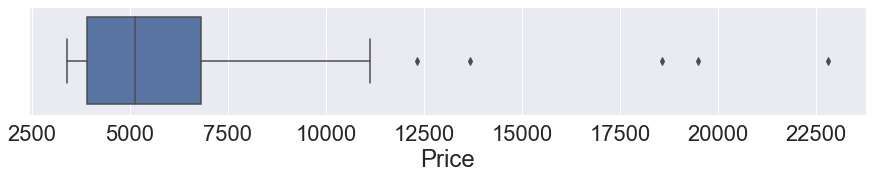

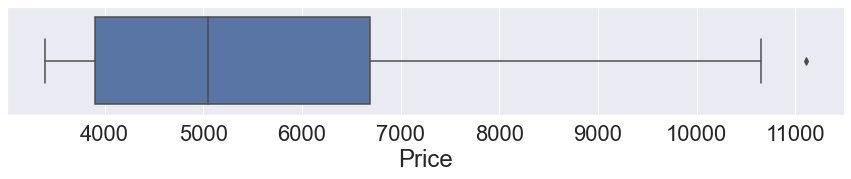

In [931]:
airDataSet = df[df['Airline']=='GoAir']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

GoAirDataSet = airDataSet

4878.0
9345.0
4467.0
-1822.5
16045.5


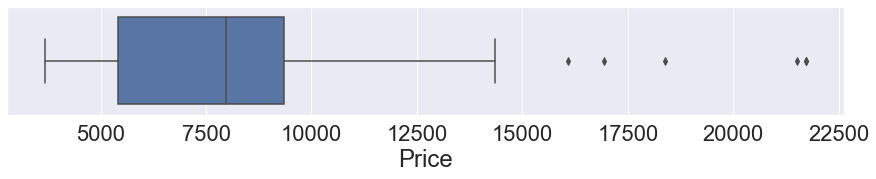

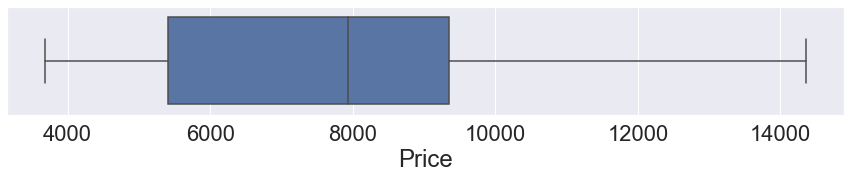

In [932]:
airDataSet = df[df['Airline']=='Vistara']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

VistaraDataSet = airDataSet

4282.0
6451.0
2169.0
1028.5
9704.5


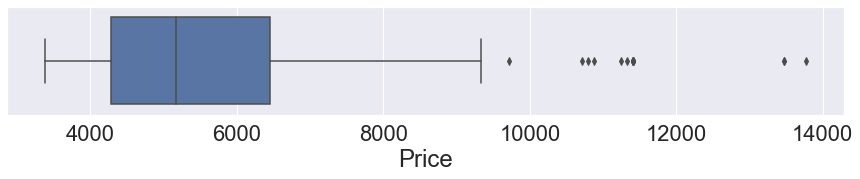

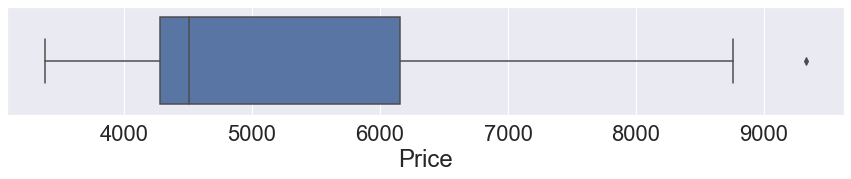

In [933]:
airDataSet = df[df['Airline']=='Air Asia']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

AirAsiaDataSet = airDataSet

7547.0
10459.0
2912.0
3179.0
14827.0


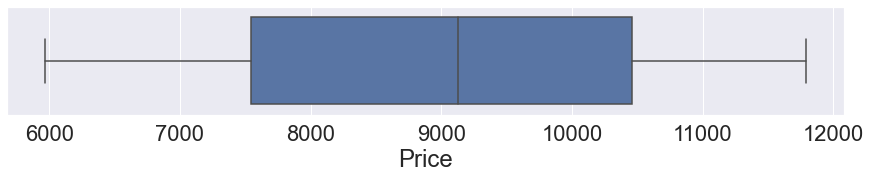

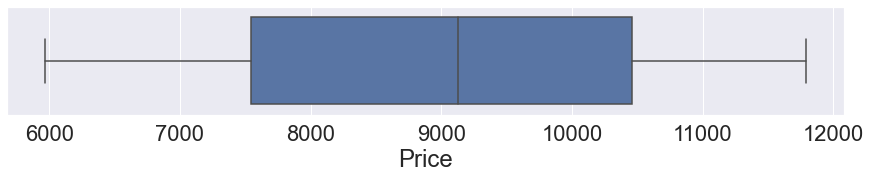

In [934]:
airDataSet = df[df['Airline']=='Vistara Premium economy']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

VistaraPremiumeconomyDataSet = airDataSet

52243.0
61122.5
8879.5
38923.75
74441.75


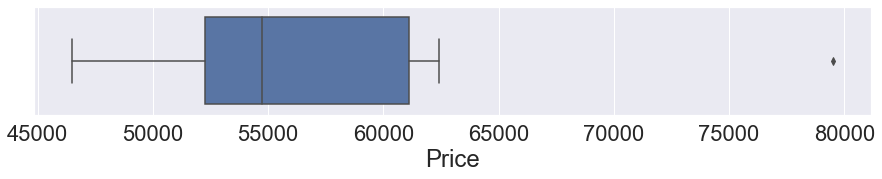

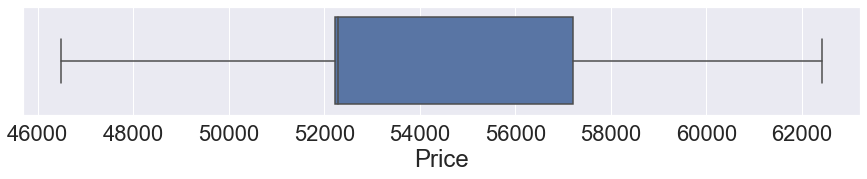

In [935]:
airDataSet = df[df['Airline']=='Jet Airways Business']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

JetAirwaysBusinessDataSet = airDataSet

9971.4
11269.0
1297.6000000000004
8024.999999999999
13215.400000000001


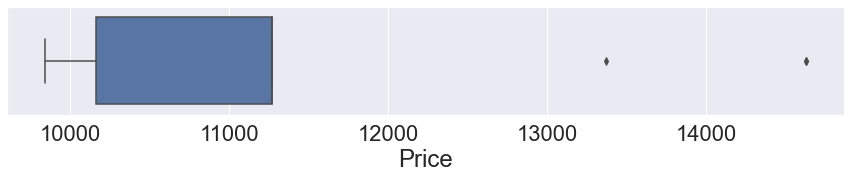

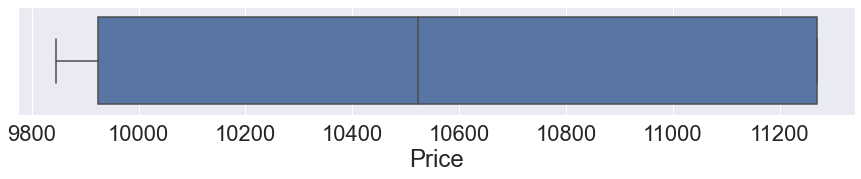

In [936]:
airDataSet = df[df['Airline']=='Multiple carriers Premium economy']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

MultiplecarriersPremiumeconomyDataSet = airDataSet

4140.0
4140.0
0.0
4140.0
4140.0


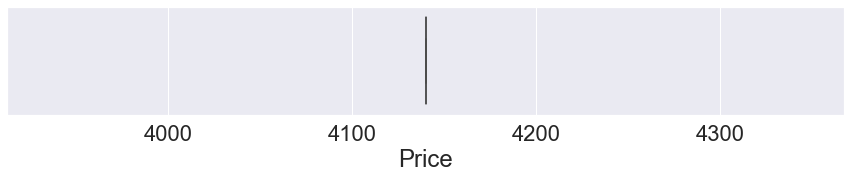

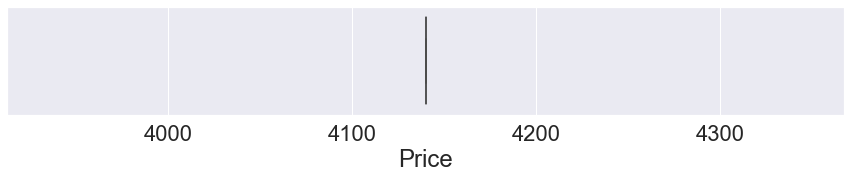

In [937]:
airDataSet = df[df['Airline']=='Trujet']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

TrujetDataSet = airDataSet

In [938]:
airlineList = [
IndiGoDataSet,
AirIndiaDataSet,
JetAirwaysDataSet,
SpiceJetDataSet,
MultiplecarriersDataSet,
GoAirDataSet,
VistaraDataSet,
AirAsiaDataSet,
VistaraPremiumeconomyDataSet,
JetAirwaysBusinessDataSet,
MultiplecarriersPremiumeconomyDataSet,
TrujetDataSet]

In [939]:
TrujetDataSet.append(MultiplecarriersPremiumeconomyDataSet)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140
717,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info,10161
1799,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,21:00,13h 30m,1 stop,No info,9845
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,19:15,10h 20m,1 stop,No info,10161
4718,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No info,9845
5090,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,13:20,7h 20m,1 stop,No info,11269
5489,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,15:30,9h 30m,1 stop,No info,11269
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
6590,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
9248,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885


In [940]:
dfs = []
for i in airlineList:
    dfs.append(i)
dfs
final_df = pd.concat(dfs, axis=0, ignore_index=True)

final_df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
10083,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
10084,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
10085,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
10086,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


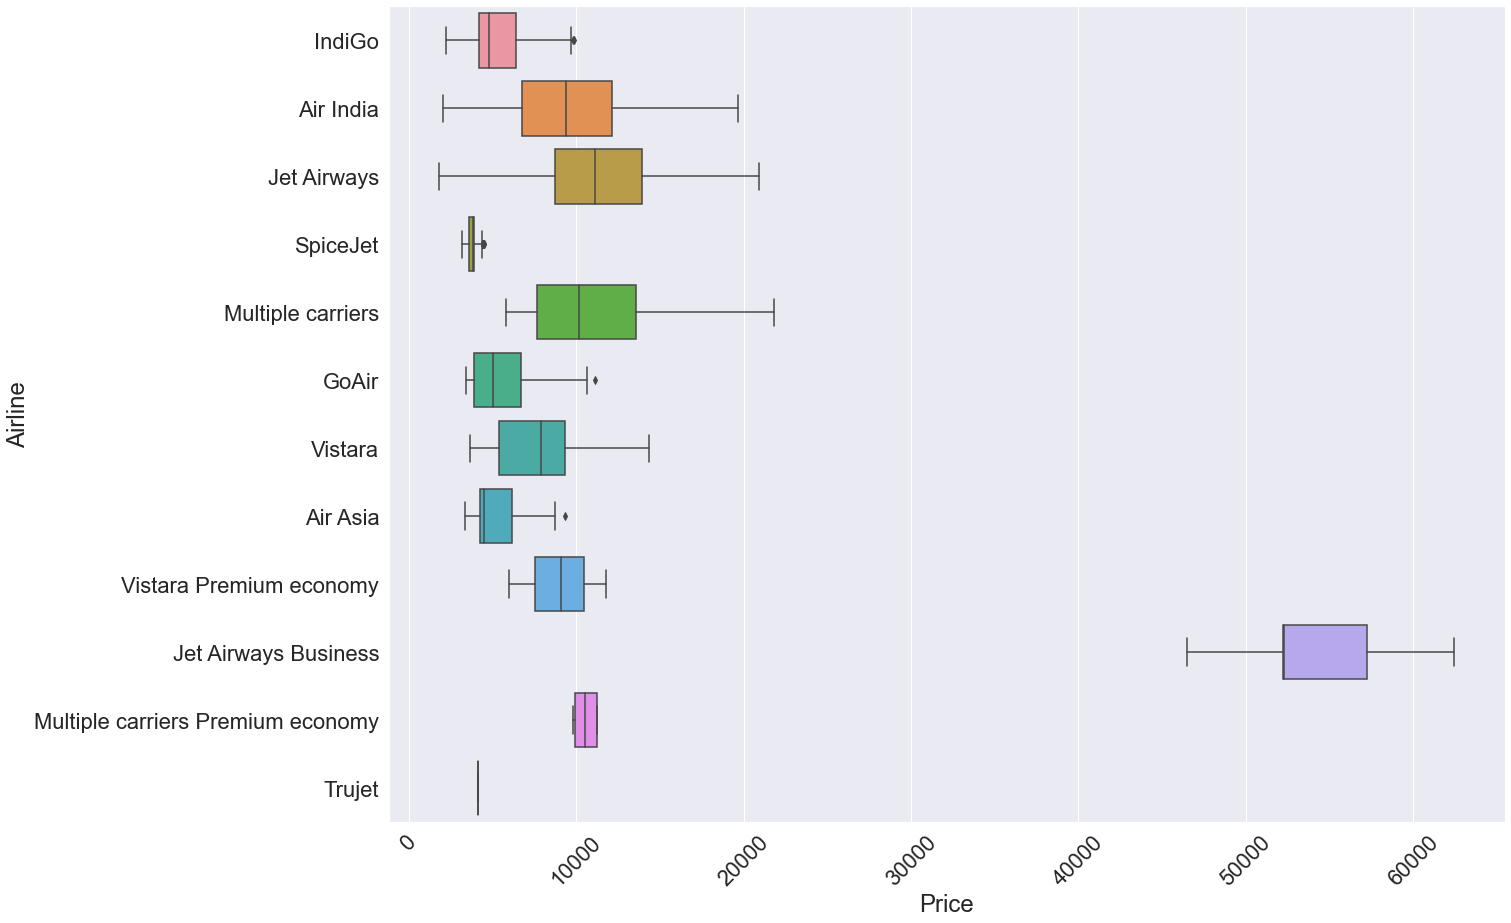

In [941]:
plt.figure(figsize=(20,15))
sns.boxplot(y=final_df['Airline'],x=final_df['Price'])
plt.xticks(rotation=45)
plt.show()


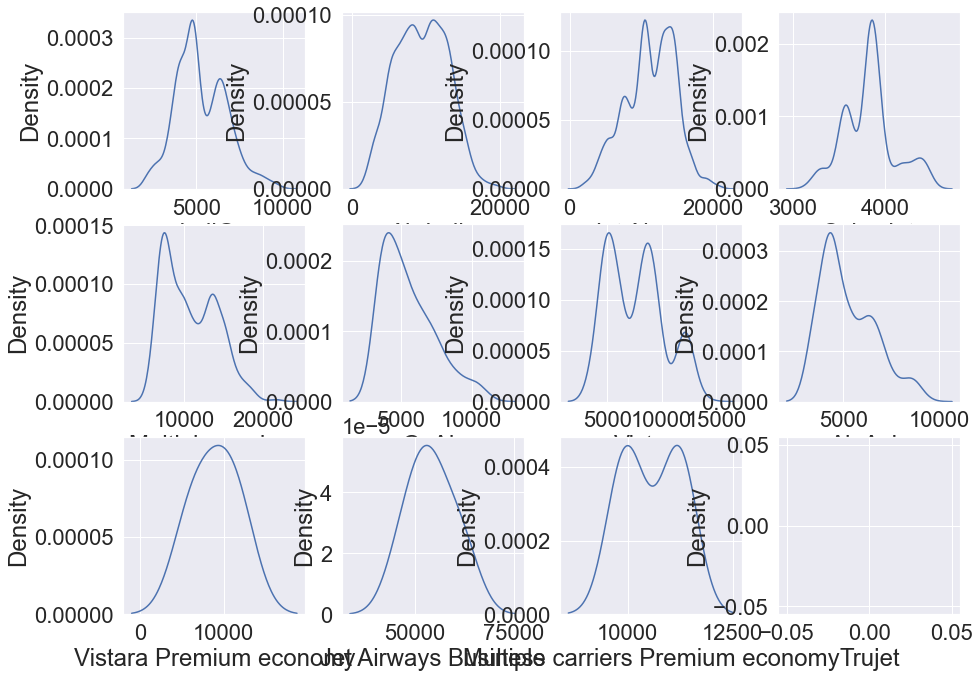

In [942]:
plt.figure(figsize=(15,15))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(4,4,i[0]+1)
    indi = final_df[final_df['Airline']==final_df['Airline'].unique()[i[0]]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [943]:
df = final_df
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
10083,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
10084,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
10085,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
10086,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


In [944]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019


In [945]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

df['Dept_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute



In [946]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [947]:
range(len(df['Duration']))

range(0, 10088)

In [948]:
df["hoursMinutes"] = 0
for i in range(len(df['Duration'])):
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55,155
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50,155
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845,21,3,2019,8,55,21,0,725
10084,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269,21,3,2019,8,55,15,30,395
10085,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885,21,3,2019,19,0,1,35,395
10086,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269,21,3,2019,7,30,15,30,480


In [949]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325


In [950]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [951]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,0


In [952]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()



,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0


In [953]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)



In [954]:
df.drop(["Arrival_Time","Arrival_Time","Date_of_Journey","Route","Airline","Duration","Source","Destination","Additional_Info"], axis = 1, inplace = True)

In [955]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([df, Airline, Source, Destination], axis = 1)



In [956]:
data_train.columns

Index(['Dep_Time', 'Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dept_Hour',
       'Dept_Minute', 'Arr_Hour', 'Arr_Minute', 'hoursMinutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [957]:
data_train = data_train[['Total_Stops', 'Day', 'Month',
       'Year', 'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute',
       'hoursMinutes', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_Delhi','Price']]


In [958]:
data_train



,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Delhi,Price
0,0,24,3,2019,22,20,1,10,170,0,...,0,0,0,0,0,1,0,0,1,3897
1,1,12,5,2019,18,5,23,30,325,0,...,0,0,1,0,0,0,0,0,0,6218
2,0,18,4,2019,20,20,22,55,155,0,...,0,0,1,0,0,0,0,0,0,4174
3,0,24,4,2019,17,15,19,50,155,0,...,0,0,1,0,0,0,0,0,0,4804
4,0,3,4,2019,4,0,6,50,170,0,...,0,0,0,0,0,1,0,0,1,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,1,21,3,2019,8,55,21,0,725,0,...,0,1,0,0,1,0,0,0,0,9845
10084,1,21,3,2019,8,55,15,30,395,0,...,0,1,0,0,1,0,0,0,0,11269
10085,1,21,3,2019,19,0,1,35,395,0,...,0,1,0,0,1,0,0,0,0,10885
10086,1,21,3,2019,7,30,15,30,480,0,...,0,1,0,0,1,0,0,0,0,11269


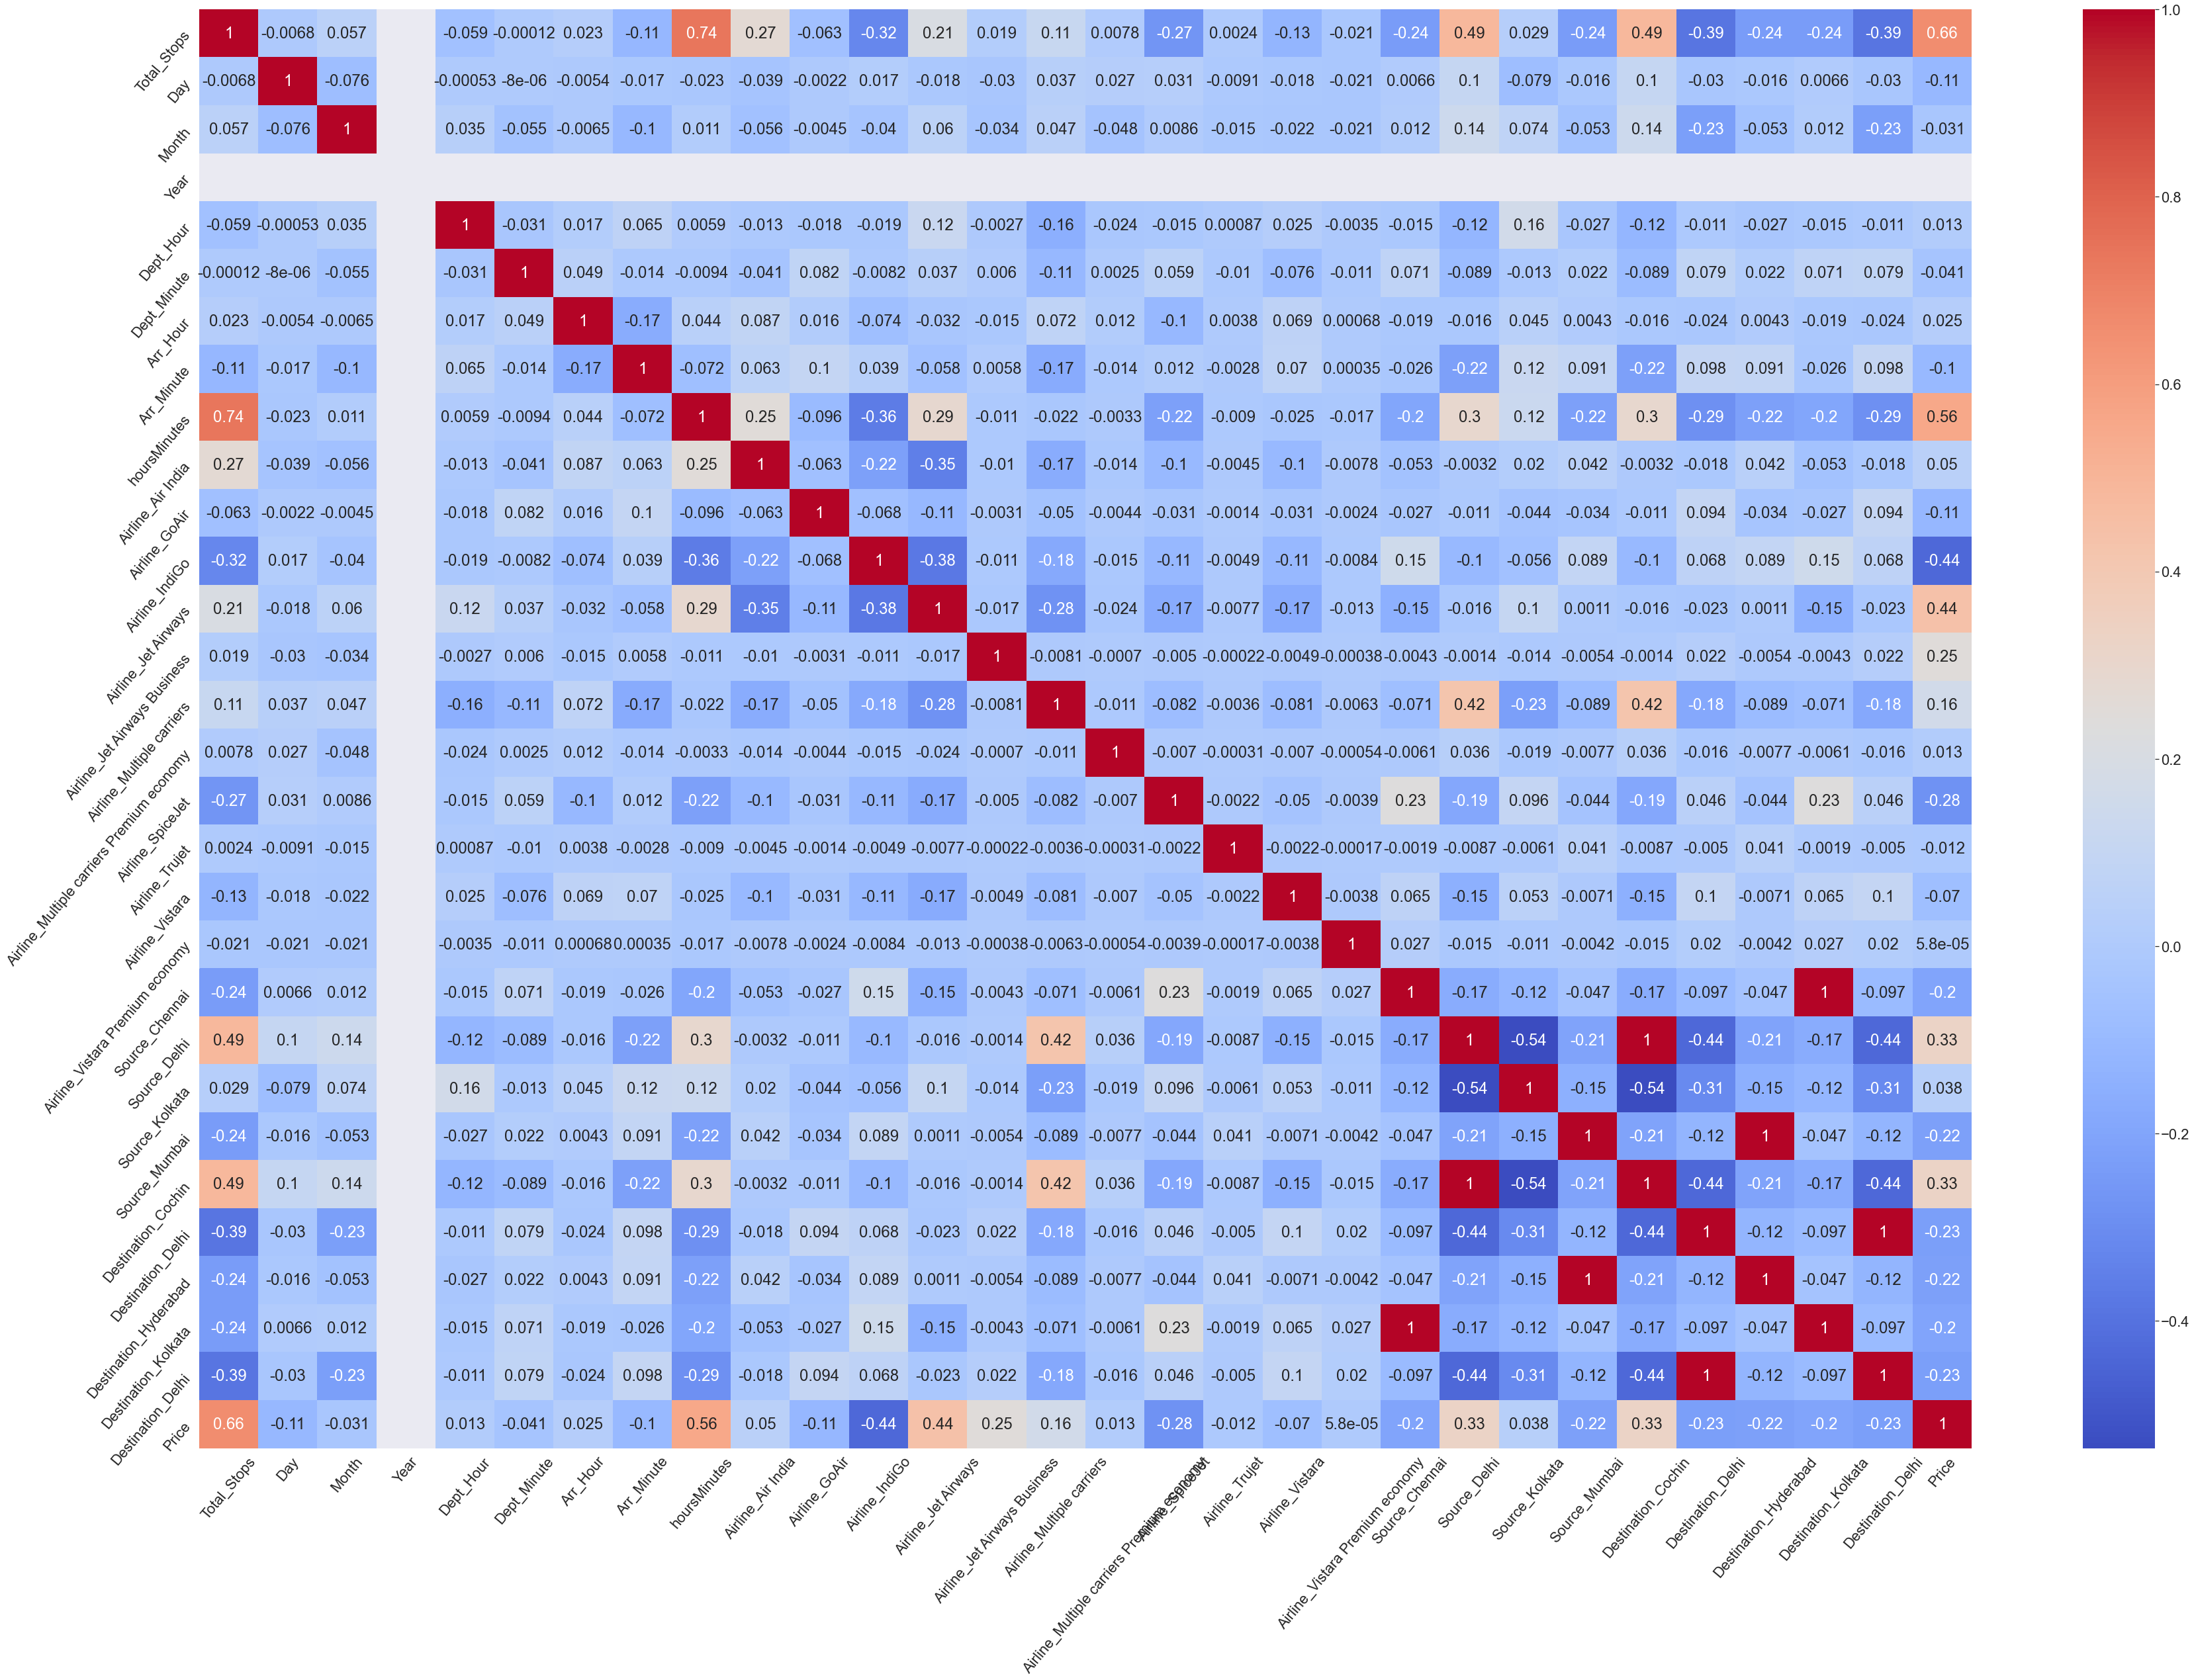

In [959]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(60,40)) 
sns.set(font_scale=2)
corr_matrix = data_train.corr()

yr = sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=ax)
yr.set_xticklabels(yr.get_xticklabels(),rotation=50)
yr.set_yticklabels(yr.get_yticklabels(),rotation=50)


plt.show()




In [960]:
# target Feature
y = data_train['Price']
y.head()

0    3897
1    6218
2    4174
3    4804
4    3943
Name: Price, dtype: int64

In [961]:
# independat Feature
X = data_train.drop(['Price'],axis=1)
X


,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Delhi
0,0,24,3,2019,22,20,1,10,170,0,...,0,0,0,0,0,0,1,0,0,1
1,1,12,5,2019,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
2,0,18,4,2019,20,20,22,55,155,0,...,0,0,0,1,0,0,0,0,0,0
3,0,24,4,2019,17,15,19,50,155,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,4,2019,4,0,6,50,170,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,1,21,3,2019,8,55,21,0,725,0,...,0,0,1,0,0,1,0,0,0,0
10084,1,21,3,2019,8,55,15,30,395,0,...,0,0,1,0,0,1,0,0,0,0
10085,1,21,3,2019,19,0,1,35,395,0,...,0,0,1,0,0,1,0,0,0,0
10086,1,21,3,2019,7,30,15,30,480,0,...,0,0,1,0,0,1,0,0,0,0


In [962]:
'''#ExtraTreeRegressor is used to check the feature importance, reature selection.
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)
'''

'#ExtraTreeRegressor is used to check the feature importance, reature selection.\nfrom sklearn.ensemble import ExtraTreesRegressor\nselection = ExtraTreesRegressor()\nselection.fit(X,y)\n'

In [963]:
'''from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)
'''

'from sklearn.ensemble import ExtraTreesRegressor\nselection = ExtraTreesRegressor()\nselection.fit(X,y)\n'

In [964]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Delhi
1197,0,18,5,2019,18,25,21,20,175,0,...,0,0,0,0,0,0,1,0,0,1
8514,1,18,5,2019,4,55,12,35,460,0,...,0,0,1,0,0,1,0,0,0,0
7756,0,24,3,2019,9,35,12,30,175,0,...,0,0,0,0,0,0,1,0,0,1
3080,1,27,3,2019,20,40,9,25,765,1,...,0,0,1,0,0,1,0,0,0,0
6473,1,6,3,2019,11,40,11,25,1425,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,9,4,2019,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
5191,0,9,4,2019,7,10,10,10,180,0,...,0,0,0,0,0,0,1,0,0,1
5390,1,12,3,2019,18,55,19,10,1455,0,...,0,0,0,0,0,0,1,0,0,1
860,0,18,4,2019,21,25,0,5,160,0,...,0,0,0,1,0,0,0,0,0,0


In [965]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_train'

In [966]:
'''from sklearn.preprocessing import MinMaxScaler

minMaxscaler = MinMaxScaler()
X_train = minMaxscaler.fit_transform(X_train)
X_train'''

'from sklearn.preprocessing import MinMaxScaler\n\nminMaxscaler = MinMaxScaler()\nX_train = minMaxscaler.fit_transform(X_train)\nX_train'

In [967]:
from sklearn.ensemble import RandomForestRegressor
modelRandForestRegressor = RandomForestRegressor()
modelRandForestRegressor.fit(X_train,y_train)


RandomForestRegressor()

In [968]:
modelRandForestRegressor.score(X_train,y_train)

0.9482610023034878

In [969]:
y_pred = modelRandForestRegressor.predict(X_test)
y_pred

array([ 3982.81      ,  7589.28369048,  9108.705     , ...,
       12389.6375    , 11430.438     , 14309.31      ])

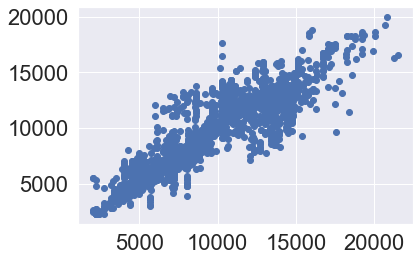

In [970]:

plt.scatter(y_test,y_pred)


In [971]:
modelRandForestRegressor.score(X_test,y_test)


0.8172840364325704

In [972]:
residuals = (y_test-y_pred)
residuals

9939    -599.810000
568       58.716310
8264    1167.295000
2344    -353.230000
5708    -363.491905
           ...     
4222    -732.175000
4264     202.653333
6608    2391.362500
7333   -1168.438000
8261     538.690000
Name: Price, Length: 2018, dtype: float64

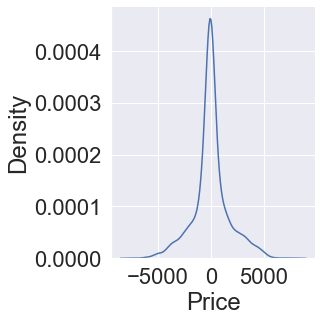

In [973]:
sns.displot(residuals,kind='kde')

In [974]:
from sklearn.ensemble import RandomForestRegressor
modelRandForestRegressor = RandomForestRegressor()
modelRandForestRegressor.fit(X_train,y_train)


RandomForestRegressor()

In [975]:
import numpy as np
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 1121.4876109337335
MSE: 2936832.7824490615
RMSE: 1713.7189916812679


In [976]:
from sklearn.metrics import r2_score

score = metrics.r2_score(y_test,y_pred)
score

0.8172840364325704

In [977]:
## Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8146186627185587

In [978]:
import pickle
file = open('flight_rf.pkl','wb')
pickle.dump(modelRandForestRegressor,file)

In [979]:
model = open('flight_rf.pkl','rb')
modelRandForest = pickle.load(model)